In [1]:
import numpy as np
import numpy.linalg as la
import numpy.random as rand
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import math
from matplotlib import cm
# import timeit
from scipy.integrate import odeint
from scipy import stats
from EDMtoolkit import *
from modelSystems import *
import datetime

plt.rcParams['text.usetex'] = True

%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
N_replicates = 100
settlingTime = 2 ** 0
E_max = 3

tlens = 2 ** np.arange(5,9)
obs_noise = np.array([0.0,0.1,0.2,0.3])
pro_noise = np.array([0.0,0.1,0.2,0.3])

settlingTime = 2 ** 9
tlen = 200
n_years = tlen / 12
end = n_years * 60 * 1.5 # 2**5 # (3.498901098901099 / (12*reduction)) * tlen # 2**3
reduction = 2 ** 8

tr = np.linspace(0, end, num=tlen)
t = tr / end

In [3]:
## Drivers ##

# r = lambda t: 3.75 # 3 + 0.75 * t / tlen
b1 = lambda t: 3 + 2 * t / end
# rho = lambda t : 28 # + 10 * t / end
# sigma = lambda t : 10 # + 10 * t / end
# beta = lambda t : 5.0 / 3.0 + 3*t/end
# F = lambda t : 5 + 15 * t / end
# N = 5

<IPython.core.display.Javascript object>


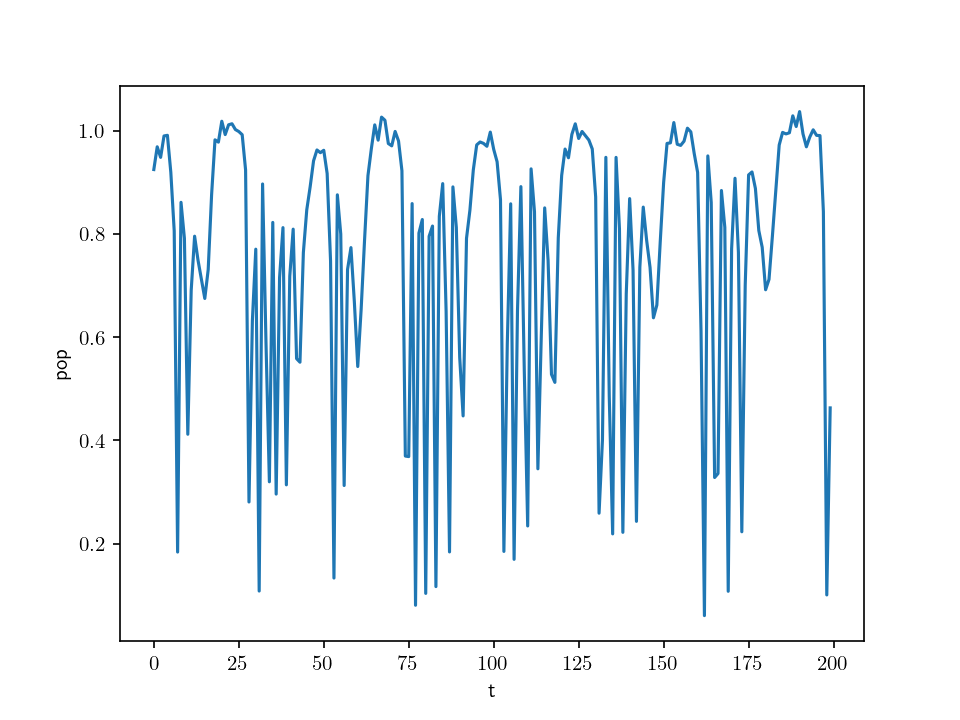

In [119]:
## Time Series Generation ##
# tlen=tlens[3]
# settlingTime = tlen

# x0 = rand.rand(1)
x0 = np.array([0.1,0.4,9]) # + rand.random(3) * 0.1

pro=0.015
# Xr = generateTimeSeriesDiscrete("LogisticP", x0, tlen=tlen, nsargs=(r,), settlingTime=settlingTime,process_noise=pro)

# x0 = rand.random(N)
# x0 = np.array([1,0.5,7]) - rand.random(3) * 0.1

# Xr = generateTimeSeriesContinuous("Lorenz96P", x0, nsargs=(F, N), tlen=tlen, end=end, settlingTime=settlingTime, reduction= reduction)[:,N-1,None]
Xr = generateTimeSeriesContinuous('HastingsPowellP', x0, nsargs=(b1,), end=end, tlen = tlen, reduction = reduction, settlingTime=settlingTime, process_noise=0.017)[:,0,None]
# Xr = generateTimeSeriesContinuous('HastingsPowell', x0, end=end, tlen = tlen, reduction = reduction, settlingTime=settlingTime, process_noise=0)[:,0,None]
# Xr = generateTimeSeriesContinuous('LorenzP', np.array([1,5,17]), nsargs=(rho, sigma, beta), tlen=tlen, end=end, settlingTime=settlingTime, reduction= reduction)[:,0,None]

plotTS(Xr)

# np.var(Xr) / no_noise_var

## Add Noise ##
# noise_magnitude = 0.1
# Xr += rand.random((Xr.shape[0],1)) * np.ptp(Xr) * noise_magnitude

In [120]:
np.std(Xr)

0.26027019352242126

In [121]:
"""
fig1 = plt.figure()
ax1 = fig1.gca(projection="3d")
ax1.plot(Xr[:,0],Xr[:,1],Xr[:,2])
plt.show()
"""

'\nfig1 = plt.figure()\nax1 = fig1.gca(projection="3d")\nax1.plot(Xr[:,0],Xr[:,1],Xr[:,2])\nplt.show()\n'

<IPython.core.display.Javascript object>


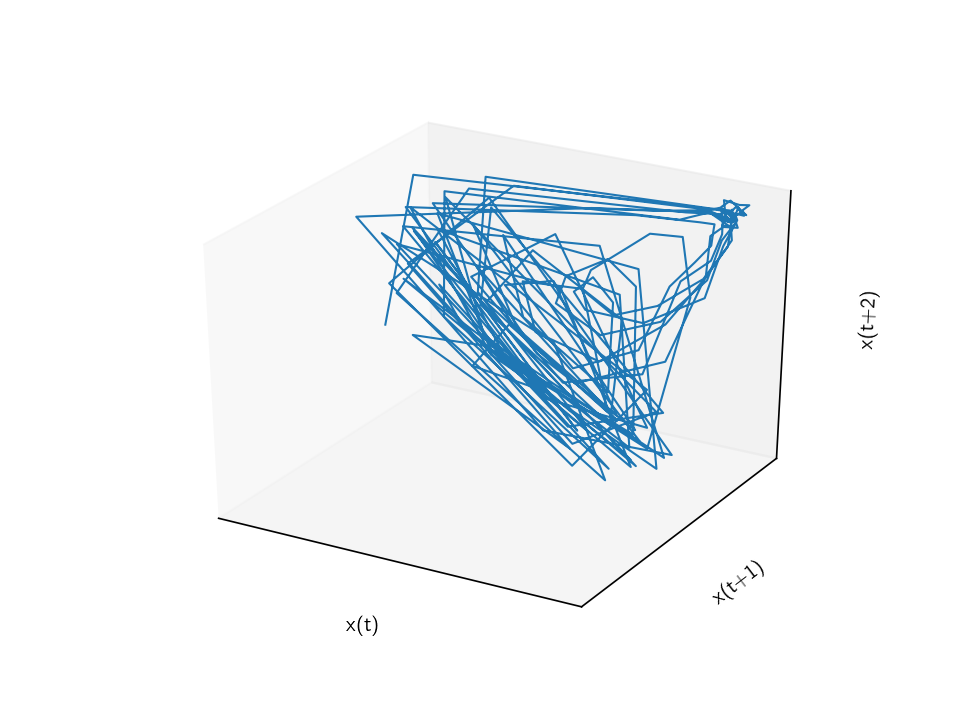

In [122]:
poincare3d(Xr,scatter=False)

<IPython.core.display.Javascript object>


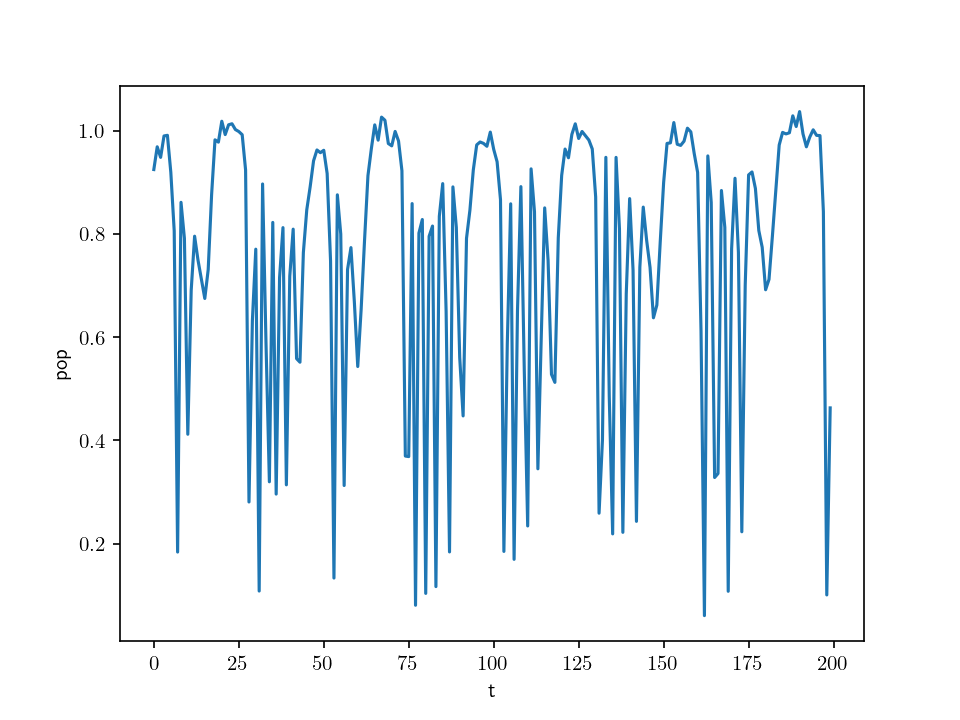

In [123]:
plotTS(Xr)

In [124]:
no_noise_var = np.var(Xr)

In [125]:
no_noise_var

0.0677405736361986

In [38]:
replicates = 50
resolution = 10

# process noise, variance
table = np.zeros((replicates*resolution,2))
process_noises = np.linspace(0.015,0.02,num=resolution)

for i in range(replicates):
    variances = np.array([np.var(generateTimeSeriesContinuous('HastingsPowell', x0 + rand.random(3) * 0.1,
                                                              end=end, tlen = tlen, reduction = reduction,
                                                              settlingTime=settlingTime,
                                                              process_noise=x)[:,0,None])
                          for x in process_noises]) / no_noise_var
    table[i*resolution:(i+1)*resolution,0] = process_noises
    table[i*resolution:(i+1)*resolution,1] = variances

Text(0.5, 1.0, 'Hastings Powell Process Noise Ratio')

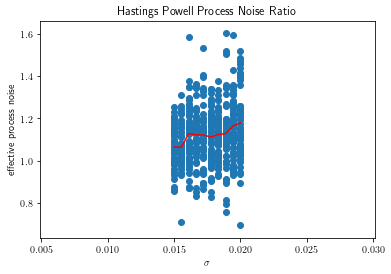

In [39]:
plt.scatter(table[:,0], table[:,1])
mean_variances = np.array([np.mean(table[table[:,0] == p,1]) for p in process_noises])
plt.plot(process_noises, mean_variances,c="red")
    
plt.xlabel(r"$\sigma$")
plt.ylabel("effective process noise")
plt.title("Hastings Powell Process Noise Ratio")

In [40]:
mean_variances

array([1.06466011, 1.06382538, 1.12800197, 1.12176972, 1.12175889,
       1.11150361, 1.1240619 , 1.12797835, 1.16375999, 1.17873908])

In [43]:
process_noises

array([0.015     , 0.01555556, 0.01611111, 0.01666667, 0.01722222,
       0.01777778, 0.01833333, 0.01888889, 0.01944444, 0.02      ])

In [40]:
"""
for i in range(20):
    process_noises = np.linspace(0,0.05,num=25)
    variances = np.array([np.var(generateTimeSeriesDiscrete("LogisticP", x0, tlen=tlen, nsargs=(r,), settlingTime=settlingTime,process_noise=x)) for x in process_noises]) / no_noise_var
    plt.plot(process_noises,variances)
    
plt.xlabel(r"$\sigma$")
plt.ylabel("effective process noise")
plt.title("Logistic Map Process Noise Ratio")
"""

'\nfor i in range(20):\n    process_noises = np.linspace(0,0.05,num=25)\n    variances = np.array([np.var(generateTimeSeriesDiscrete("LogisticP", x0, tlen=tlen, nsargs=(r,), settlingTime=settlingTime,process_noise=x)) for x in process_noises]) / no_noise_var\n    plt.plot(process_noises,variances)\n    \nplt.xlabel(r"$\\sigma$")\nplt.ylabel("effective process noise")\nplt.title("Logistic Map Process Noise Ratio")\n'

In [126]:
process_noise_levels = 2 ** np.arange(-5,-2)

ValueError: Integers to negative integer powers are not allowed.

In [ ]:
plotTS(Xr)

In [ ]:
delta_agg, r_sqrd_EDM, ns_area = get_delta_agg(Xr, 3, return_forecast_skill=True)

In [ ]:
delta_agg

In [ ]:
r_sqrd_EDM

In [ ]:
N_replicates = 10
for tlen in tlens:
    for obs in obs_noise:
        for pro in pro_noise:
            logistic_stationary = np.zeros((N_replicates,3))
            logistic_nonstationary = np.zeros((N_replicates,3))
            
            for i in range(N_replicates):
                x0 = rand.rand(1)
                
                r = lambda t: 3.75
                Xr_s = generateTimeSeriesDiscrete("LogisticP", x0, tlen=tlen, nsargs=(r,), settlingTime=settlingTime,process_noise=0.12*pro)
                r = lambda t: 3 + 0.75 * t / tlen
                Xr_ns = generateTimeSeriesDiscrete("LogisticP", x0, tlen=tlen, nsargs=(r,), settlingTime=settlingTime,process_noise=0.12*pro)
                
                Xr_s += (rand.random((tlen,1))-0.5) * np.ptp(Xr_s) * obs
                Xr_ns += (rand.random((tlen,1))-0.5) * np.ptp(Xr_ns) * obs
                
                delta_agg_s, theta_agg_s, r_sqrd_s = get_delta_agg(Xr_s, E_max, return_forecast_skill=True)
                delta_agg_ns, theta_agg_ns, r_sqrd_ns = get_delta_agg(Xr_ns, E_max, return_forecast_skill=True)
                
                logistic_stationary[i,0] = delta_agg_s
                logistic_stationary[i,1] = theta_agg_s
                logistic_stationary[i,2] = r_sqrd_s
                logistic_nonstationary[i,0] = delta_agg_ns
                logistic_nonstationary[i,1] = theta_agg_ns
                logistic_nonstationary[i,2] = r_sqrd_ns
                
            np.savetxt(f"logistic_results/logistic_stationary_{tlen}_{obs}_{pro}.csv",logistic_stationary, fmt="%0.4f,%0.4f,%0.4f")
            np.savetxt(f"logistic_results/logistic_nonstationary_{tlen}_{obs}_{pro}.csv",logistic_nonstationary, fmt="%0.4f,%0.4f,%0.4f")

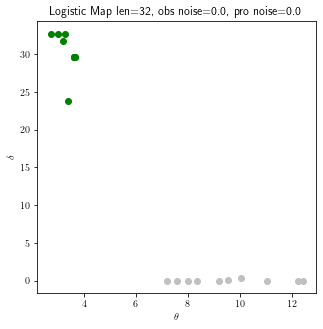

In [34]:
time_series_length = tlens[0]
observation_noise = obs_noise[0]
process_noise = pro_noise[0]

S = np.loadtxt(f"logistic_results/logistic_stationary_{time_series_length}_{observation_noise}_{process_noise}.csv",delimiter=",")
NS = np.loadtxt(f"logistic_results/logistic_nonstationary_{time_series_length}_{observation_noise}_{process_noise}.csv",delimiter=",")

fig, ax = plt.subplots(1,figsize=(5,5))
ax.scatter(S[:,1],S[:,0],color="silver")
ax.scatter(NS[:,1],NS[:,0],color="green")
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$\delta$")
ax.set_title(f"Logistic Map len={time_series_length}, obs noise={observation_noise}, pro noise={process_noise}")

plt.show()

In [20]:
def generateTimeSeriesFigure(X, filename, title):
    fig, ax = plt.subplots(1)
    ax.plot(np.linspace(0,1,num=len(X)), X)
    ax.set_xlabel(r"Time")
    ax.set_ylabel(r"Abundance")
    ax.set_title(title)
    
    plt.savefig(f"../Figures/round2_series/{filename}",dpi=600)

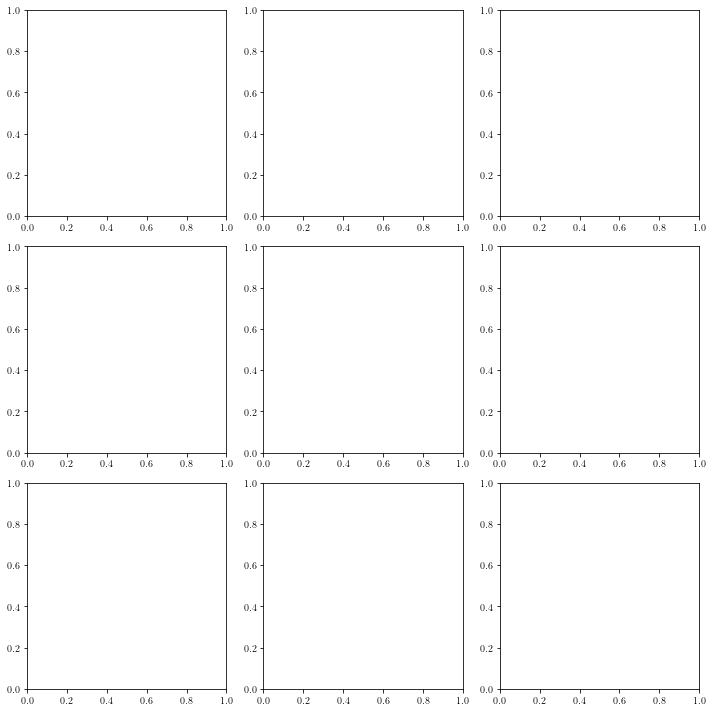

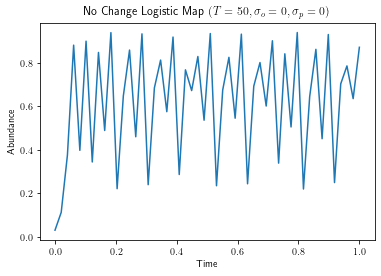

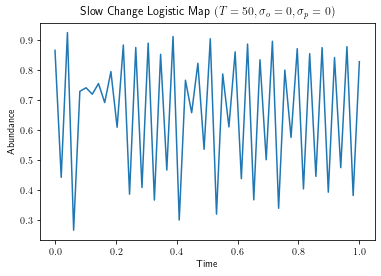

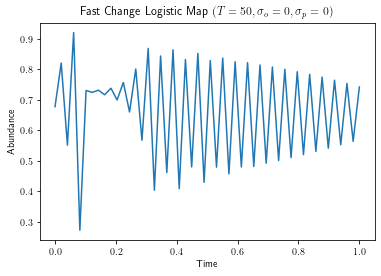

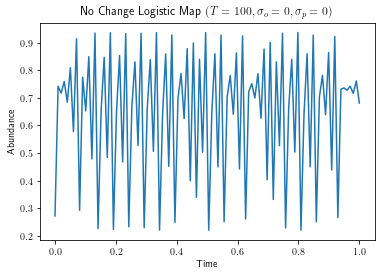

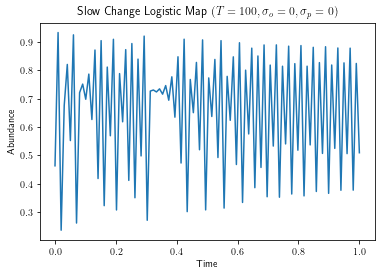

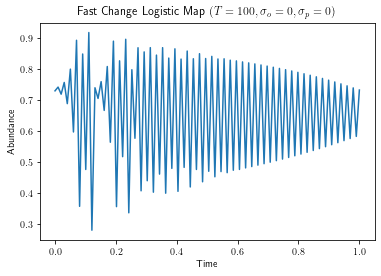

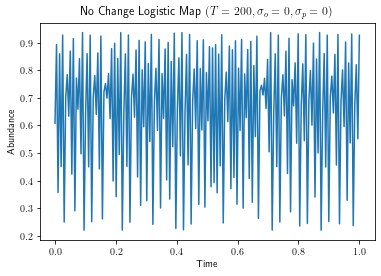

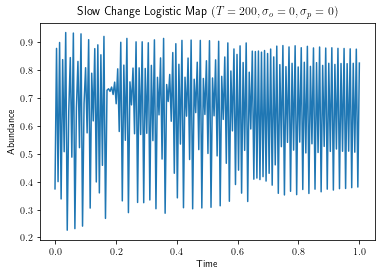

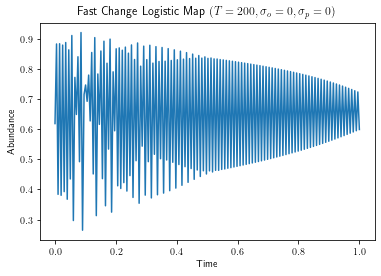

In [29]:
# Time Series Length versus Nonstationarity Rate
T_list = (50, 100, 200)
r_list = (lambda t: 3.75, lambda t: 3.75 - 0.25 * t, lambda t: 3.75 - 0.75 * t)
N_replicates = 1
E_max = 3
ns_status = ["No Change", "Slow Change", "Fast Change"]

# Time Series Length, nonstationarity status, delta, theta, r_sqrd
results = np.zeros((N_replicates * len(T_list) * len(r_list), 5))
results_index = 0

for ti, T in enumerate(T_list):
    for ri, r in enumerate(r_list):
        for i in range(N_replicates):
            x0 = rand.rand(1)
            Xr = generateLogisticMapProcessNoise(tlen = T, r=r, x0 = x0)
            
            filename = f"round2_logistic_T={T}_NS={ri}.png"
            fig_title = r"{} Logistic Map $(T={},\sigma_o=0,\sigma_p=0)$".format(ns_status[ri], T)
        
            generateTimeSeriesFigure(Xr, filename, fig_title)
            
            """
            delta_agg, theta_agg, r_sqrd = get_delta_agg(Xr, E_max, return_forecast_skill=True)
            
            results[results_index] = np.array([T, ri, delta_agg, theta_agg, r_sqrd])
            results_index += 1
            
np.savetxt(f"logistic_T_vs_NS_Rate.csv", results, fmt="%0.4f,%0.4f,%0.4f,%0.4f,%0.4f")
"""

In [391]:
# np.mean(results[np.logical_and(results[:,0] == 50, results[:,1]==1),2] > 0.1)

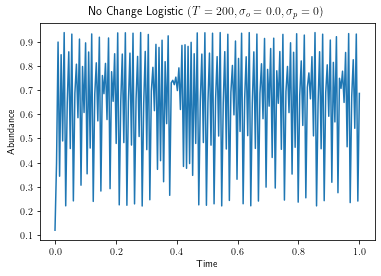

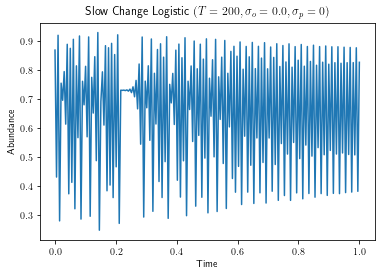

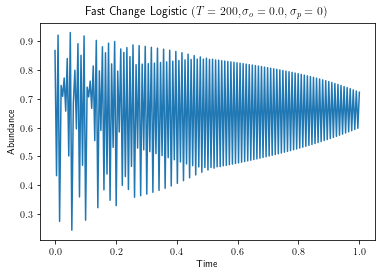

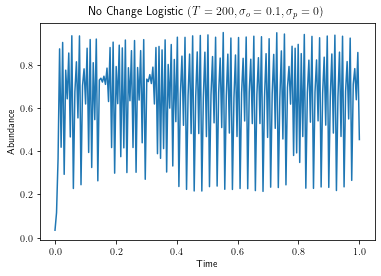

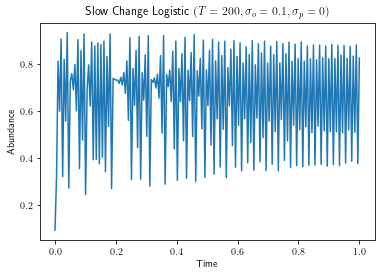

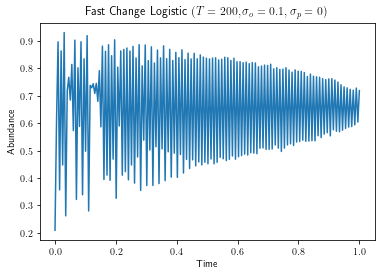

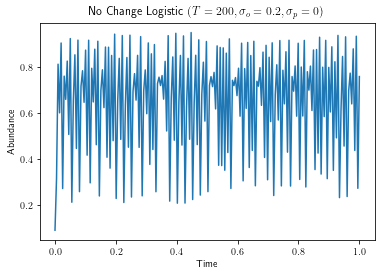

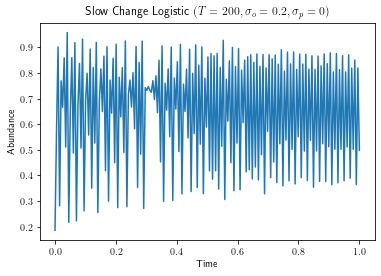

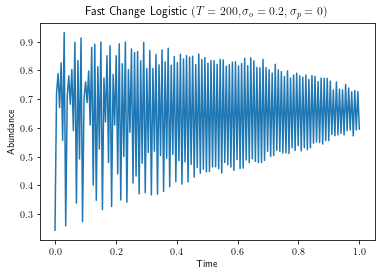

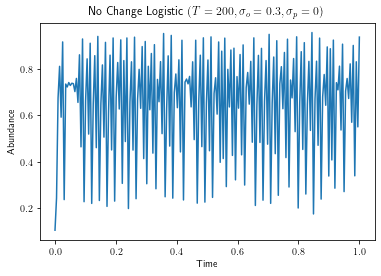

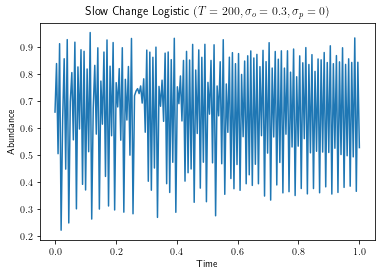

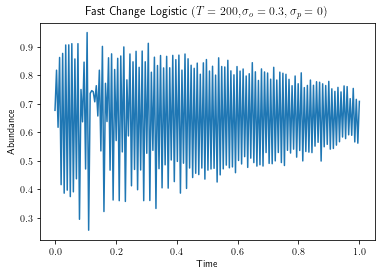

In [33]:
# Observation Noise versus Nonstationarity Rate
T = 200
obs_list = (0.0,0.1,0.2,0.3)
r_list = (lambda t: 3.75, lambda t: 3.75 - 0.25 * t, lambda t: 3.75 - 0.75 * t)
# r_list = (lambda t: 4, lambda t: 4 - 0.25 * t / T, lambda t: 4 - t / T)
N_replicates = 1
E_max = 3

# log_std is calculated as the standard deviation on a stationary logistic map series with T=200 and r=3.75
log_std = 0.05448021777823845

# observation noise, nonstationarity status, delta, theta, r_sqrd
results = np.zeros((N_replicates * len(obs_list) * len(r_list), 5))
results_index = 0

for o_n in obs_list:
    for ri, r in enumerate(r_list):
        for i in range(N_replicates):
            x0 = rand.rand(1)
            Xr = generateLogisticMapProcessNoise(r=r, x0 = x0)
            # Xr = generateTimeSeriesDiscrete("LogisticP", x0, tlen=T, nsargs=(r,), settlingTime=settlingTime)
            Xr += (rand.normal(0,1,T) * log_std * o_n)[:,None]
            
            filename = f"round2_logistic_sigma_o={o_n}_NS={ri}.png"
            fig_title = r"{} Logistic $(T=200,\sigma_o={},\sigma_p=0)$".format(ns_status[ri], o_n)
        
            generateTimeSeriesFigure(Xr, filename, fig_title)
            
            """
            delta_agg, theta_agg, r_sqrd = get_delta_agg(Xr, E_max, return_forecast_skill=True)
            
            results[results_index] = np.array([o_n, ri, delta_agg, theta_agg, r_sqrd])
            results_index += 1
            
np.savetxt(f"logistic_obsnoise_vs_NS_Rate.csv", results, fmt="%0.4f,%0.4f,%0.4f,%0.4f,%0.4f")
"""

In [393]:
# Process Noise versus Nonstationarity Rate
T = 200
pro_list = (0.0, logistic_process_noise)
r_list = (lambda t: 3.75, lambda t: 3.75 - 0.25 * t, lambda t: 3.75 - 0.75 * t)
# r_list = (lambda t: 4, lambda t: 4 - 0.25 * t / T, lambda t: 4 - t / T)
N_replicates = 100
E_max = 3

# process noise, nonstationarity status, delta, theta, r_sqrd
results = np.zeros((N_replicates * len(pro_list) * len(r_list), 5))
results_index = 0

for p_n in pro_list:
    for ri, r in enumerate(r_list):
        for i in range(N_replicates):
            x0 = rand.rand(1)
            
            # generate time series, regenerating if it explodes
            # Xr = generateTimeSeriesDiscrete("LogisticP", x0, tlen=T, nsargs=(r,), settlingTime=settlingTime, process_noise=p_n)
            Xr = generateLogisticMapProcessNoise(process_noise = p_n, r=r, x0 = x0)
            
            # while np.any(np.isnan(Xr)):
            #     Xr = generateTimeSeriesDiscrete("LogisticP", x0, tlen=T, nsargs=(r,), settlingTime=settlingTime, process_noise=p_n)
        
            delta_agg, theta_agg, r_sqrd = get_delta_agg(Xr, E_max, return_forecast_skill=True)
            
            results[results_index] = np.array([p_n, ri, delta_agg, theta_agg, r_sqrd])
            results_index += 1
            
np.savetxt(f"logistic_pronoise_vs_NS_Rate.csv", results, fmt="%0.4f,%0.4f,%0.4f,%0.4f,%0.4f")

In [282]:
np.sum(results[:,4] > 0)

300

In [ ]:
# table = np.loadtxt("logistic_pronoise_vs_NS_Rate.csv",delimiter=',')

In [2]:
# How good is we be doin?

other_var = "obsnoise"
filename = f"logistic_{other_var}_vs_NS_Rate.csv"
table = np.loadtxt(filename, delimiter=",")

# variable, nonstationarity status, delta, theta, r_sqrd
var_val = 0.2
nonstationarity_rate = 2.0

true_stat = np.mean(table[np.logical_and(table[:,2] < 0.1, table[:,0] == var_val),1] == 0)
true_nonstat = np.mean(table[np.logical_and(np.logical_and(table[:,2] >= 0.1, table[:,0] == var_val),
                             np.logical_or(table[:,1] == 0, table[:,1] == nonstationarity_rate)),1] == nonstationarity_rate)
false_stat = 1 - true_stat
false_nonstat = 1 - true_nonstat

In [4]:
print("          S     NS")
print(f"d<0.1   {true_stat:.3f} {false_stat:.3f}")
print(f"d>0.1   {false_nonstat:.3f} {true_nonstat:.3f}")

          S     NS
d<0.1   0.950 0.050
d>0.1   0.038 0.962


In [396]:
# Time Series Length versus Nonstationarity Rate
T_list = (50, 100, 200)
b1_list = (lambda t: 3, lambda t: 3 + 2 * t / end, lambda t: 3 + 4 * t / end)
N_replicates = 1
E_max = 4
tau = 1
settlingTime = 2 ** 9
reduction = 2 ** 8

# Time Series Length, nonstationarity status, delta, theta, r_sqrd
results = np.zeros((N_replicates * len(T_list) * len(b1_list), 5))
results_index = 0

for T in T_list:
    end = T * 5
    
    for b1i, b1 in enumerate(b1_list):
        for i in range(N_replicates):
            
            
            x0 = np.array([0.1,0.4,9]) + rand.random(3)
            Xr = generateTimeSeriesContinuous('HastingsPowellP', x0, end=end, tlen = T, nsargs=(b1,), 
                                              reduction = reduction, settlingTime=settlingTime, 
                                              process_noise=0)[:,0,None]
    
            delta_agg, theta_agg, r_sqrd = get_delta_agg(Xr, E_max, tau=tau, return_forecast_skill=True)
            
            results[results_index] = np.array([T, b1i, delta_agg, theta_agg, r_sqrd])
            results_index += 1
            
np.savetxt(f"hastings_powell_T_vs_NS_Rate.csv", results, fmt="%0.4f,%0.4f,%0.4f,%0.4f,%0.4f")

In [270]:
# Observation Noise versus Nonstationarity Rate
T = 200
end = T * 5
# n_years = T / 12
# end = n_years * 60

obs_list = (0.0,0.1,0.2,0.3)
b1_list = (lambda t: 3, lambda t: 3 + 2 * t / end, lambda t: 3 + 4 * t / end)
# b1_list = (lambda t: 3, lambda t: 3 + 1 * t / end, lambda t: 3 + 3 * t / end)
N_replicates = 100

# log_std is calculated as the standard deviation on a stationary hastings powell map series with T=200 and b1=3
log_std = 0.20682984252169215

# observation noise, nonstationarity status, delta, theta, r_sqrd
results = np.zeros((N_replicates * len(obs_list) * len(b1_list), 5))
results_index = 0

for o_n in obs_list:
    for b1i, b1 in enumerate(b1_list):
        for i in range(N_replicates):
            x0 = np.array([0.1,0.4,9]) + rand.random(3)
            Xr = generateTimeSeriesContinuous('HastingsPowellP', x0, end=end, tlen = T, nsargs=(b1,), 
                                              reduction = reduction, settlingTime=settlingTime, 
                                              process_noise=0)[:,0,None]
            Xr += (rand.normal(0,1,T) * log_std * o_n)[:,None]
            
            delta_agg, theta_agg, r_sqrd = get_delta_agg(Xr, E_max, return_forecast_skill=True)
            
            results[results_index] = np.array([o_n, b1i, delta_agg, theta_agg, r_sqrd])
            results_index += 1
            
np.savetxt(f"hastings_powell_obsnoise_vs_NS_Rate.csv", results, fmt="%0.4f,%0.4f,%0.4f,%0.4f,%0.4f")

In [271]:
# Process Noise versus Nonstationarity Rate
T = 200
end = T * 5
# n_years = T / 12
# end = n_years * 60

pro_list = (0.0,0.017)
b1_list = (lambda t: 3, lambda t: 3 + 2 * t / end, lambda t: 3 + 4 * t / end)
# b1_list = (lambda t: 3, lambda t: 3 + 1 * t / end, lambda t: 3 + 3 * t / end)
N_replicates = 100

# process noise, nonstationarity status, delta, theta, r_sqrd
results = np.zeros((N_replicates * len(pro_list) * len(b1_list), 5))
results_index = 0

for p_n in pro_list:
    for b1i, b1 in enumerate(b1_list):
        for i in range(N_replicates):
            x0 = np.array([0.1,0.4,9]) + rand.random(3)
            Xr = generateTimeSeriesContinuous('HastingsPowellP', x0, end=end, tlen = T, nsargs=(b1,), 
                                              reduction = reduction, settlingTime=settlingTime, 
                                              process_noise=p_n)[:,0,None]
            
            delta_agg, theta_agg, r_sqrd = get_delta_agg(Xr, E_max, return_forecast_skill=True)
            
            results[results_index] = np.array([p_n, b1i, delta_agg, theta_agg, r_sqrd])
            results_index += 1
            
np.savetxt(f"hastings_powell_pronoise_vs_NS_Rate.csv", results, fmt="%0.4f,%0.4f,%0.4f,%0.4f,%0.4f")

In [279]:
# np.savetxt(f"hastings_powell_pronoise_vs_NS_Rate.csv", results, fmt="%0.4f,%0.4f,%0.4f,%0.4f,%0.4f")

In [11]:
# How good is we be doin?

other_var = "T"
filename = f"hastings_powell_{other_var}_vs_NS_Rate.csv"
table = np.loadtxt(filename, delimiter=",")

# variable, nonstationarity status, delta, theta, r_sqrd
var_val = 200
nonstationarity_rate = 2

is_0_or_nsr = np.logical_and(table[:,0] == var_val,
                             np.logical_or(table[:,1]==0,
                                           table[:,1]==nonstationarity_rate))

true_stat =    np.mean(table[np.logical_and(table[:,2] < 0.1, is_0_or_nsr),1] == 0)
true_nonstat = np.mean(table[np.logical_and(table[:,2] >= 0.1, is_0_or_nsr),1] == nonstationarity_rate)

false_stat = 1 - true_stat
false_nonstat = 1 - true_nonstat

# there is a bug in this, ns_rate = 1, 2 always give the same results.

In [12]:
print("          S     NS")
print(f"d<0.1   {true_stat:.3f} {false_stat:.3f}")
print(f"d>0.1   {false_nonstat:.3f} {true_nonstat:.3f}")

          S     NS
d<0.1   1.000 0.000
d>0.1   0.065 0.935


# The figure
This figure emulates the version found in the chaos paper, which encodes many dimensions as a grid of heatmaps.

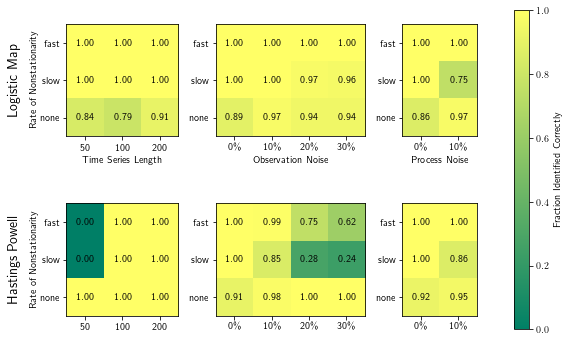

<Figure size 432x288 with 0 Axes>

In [7]:
fig = plt.figure(tight_layout=True,figsize=(8,5))
shrink = 0.8
grid = gridspec.GridSpec(2,4, width_ratios=[3,4,2,0.4])
nice_variable_names = ["Time Series Length", "Observation Noise","Process Noise"]
nice_model_names = ["Logistic Map", "Hastings Powell"]
# fig, ax = plt.subplots(2,3)
# plt.tight_layout()

for i, model in enumerate(["logistic", "hastings_powell"]):
    for j, variable in enumerate(["T","obsnoise","pronoise"]):
        filename = f"simulation_results_final/{model}_{variable}_vs_NS_Rate.csv"
        table = np.loadtxt(filename, delimiter=",")
        
        # observation noise, nonstationarity status, delta, theta, r_sqrd
        variables = np.unique(table[:,0])
        heatmap = np.zeros((3,len(variables)))

        ax = fig.add_subplot(grid[i,j]) if j < 2 else fig.add_subplot(grid[i,2:3])
        
        for k, val in enumerate(variables):
            for nsrate in range(3):
                accuracy = np.mean(table[np.logical_and(table[:,0] == val,table[:,1] == nsrate),2] > 0.1)
                accuracy = accuracy if nsrate else 1 - accuracy
                heatmap[nsrate,k] = accuracy
                ax.text(k,nsrate,f"{accuracy:.2f}",ha='center',va='center')
        
        aximage = ax.imshow(heatmap,vmin=0,vmax=1,cmap='summer')
        left, right, _, _ = aximage.get_extent()
        
        ax.set_xticks(np.arange(len(variables)))
        if j == 0:
            ax.set_xticklabels(variables.astype(int))
        elif j == 1:
            ax.set_xticklabels(np.array(["0\%","10\%","20\%","30\%"]))
        else:
            ax.set_xticklabels(np.array(["0\%","10\%"]))
        if model == "logistic":
            ax.set_xlabel(nice_variable_names[j])
        ax.set_yticks(np.arange(3))
        ax.set_yticklabels(["none","slow","fast"])
        ax.set_ylim([-0.5,2.5])
        
        if (j == 0):
            # ax.set_ylabel(nice_model_names[i], labelpad=25, fontsize=12)
            ax.set_ylabel(nice_model_names[i], labelpad = 20, fontsize=14)
            fig.text(-0.25, 0.5, "Rate of Nonstationarity", rotation="vertical", transform=ax.transAxes,
                              horizontalalignment="right", verticalalignment="center")
            
# fig.text(0.07,0.5375,"Rate of Nonstationarity", rotation="vertical",
#          horizontalalignment="center", verticalalignment="center", size=12 )
# plt.tight_layout()
# cax = plt.axes([0.905, 0.09, 0.02, 0.845])
# fig.colorbar(aximage, cax = cax, label = "Fraction Identified Correctly")
colorbar_ax = fig.add_subplot(grid[:,3])
fig.colorbar(aximage, cax = colorbar_ax, 
             label = "Fraction Identified Correctly", 
             shrink=0.1, anchor=(1000,1))
plt.show()
plt.savefig("../Figures/round2.png", dpi=600)

<IPython.core.display.Javascript object>


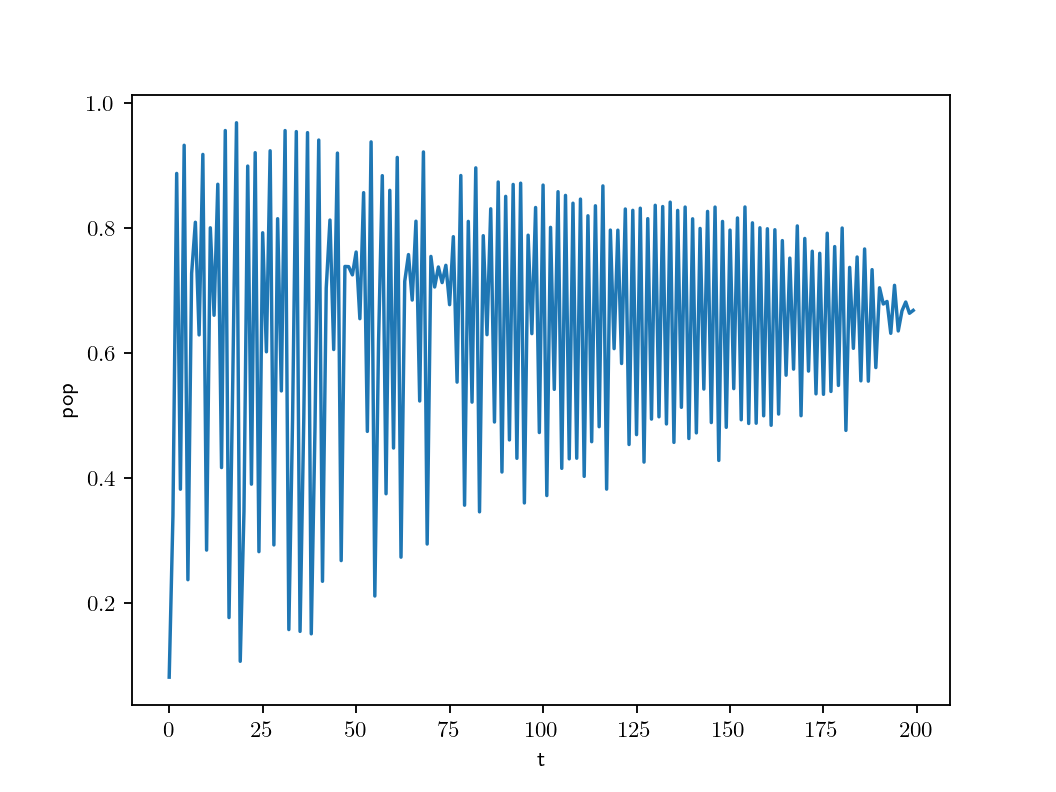

<IPython.core.display.Javascript object>


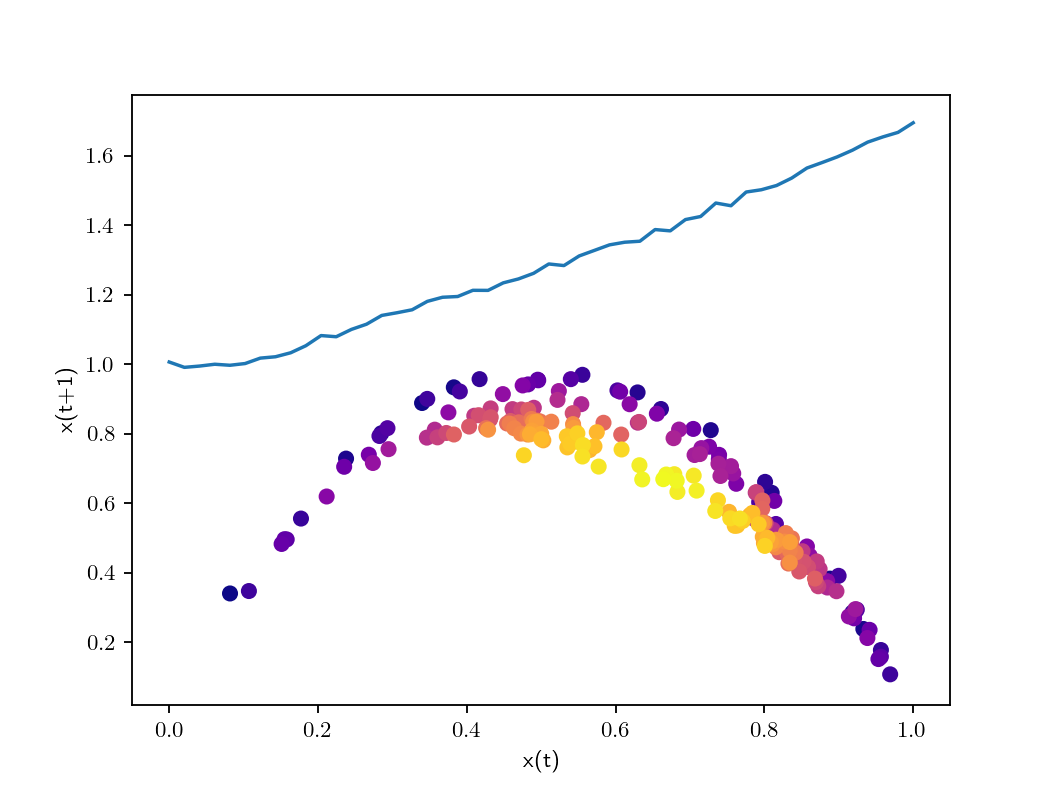

In [328]:
ts = generateLogisticMapProcessNoise(r = lambda t: 4 - t,process_noise = 0.1)
    
plotTS(ts)
poincare2d(ts, color_wrt_time = True)

# Process Noise Parameter Determination

In [31]:
## LOGISTIC MAP ##

compute_logistic_variance = lambda p : np.mean(np.array([
                            np.var(generateLogisticMapProcessNoise(
                            process_noise = p, r=lambda t: 3.75,
                            x0 = rand.rand(1)[0]))
                            for _ in range(100)]))

logistic_null_variance = compute_logistic_variance(0)

In [32]:
logistic_null_variance

0.05448021777823845

In [354]:
pn = np.linspace(0,1,num=50)
varratios = np.array([compute_logistic_variance(p) / logistic_null_variance for p in pn])

In [462]:
# FINAL VALUE 

logistic_process_noise = pn[12]

In [464]:
logistic_process_noise

0.24489795918367346

<IPython.core.display.Javascript object>


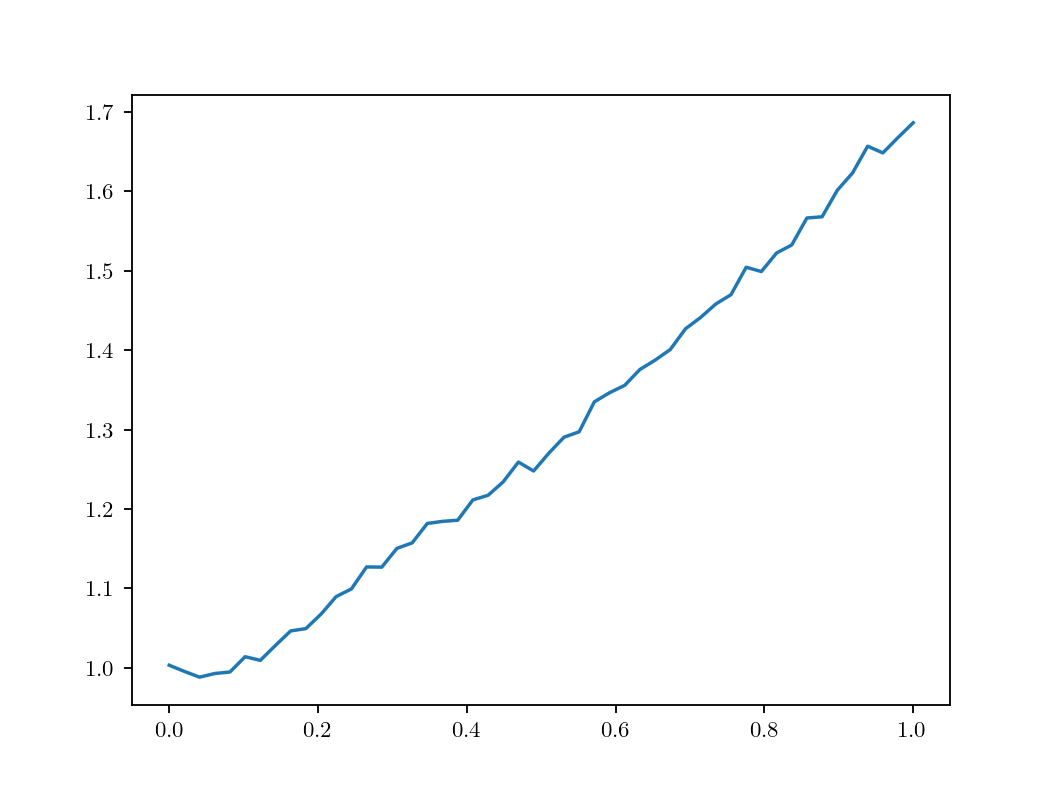

In [355]:
figPN, axPN = plt.subplots(1)
axPN.plot(pn, varratios)

In [241]:
## RICKER ##

# Compute Noiseless variance

compute_ricker_variance = lambda p : np.mean(np.array([
                       np.var(generateTimeSeriesDiscrete("RickerP",
                       rand.rand(1), tlen = T, process_noise = p,
                       nsargs=(lambda t: 3.75,)))
                       for _ in range(100)]))

In [252]:
# Compute Noiseless variance
ricker_null_var = compute_ricker_variance(0)
ricker_null_var

1.8541725352222715

<IPython.core.display.Javascript object>


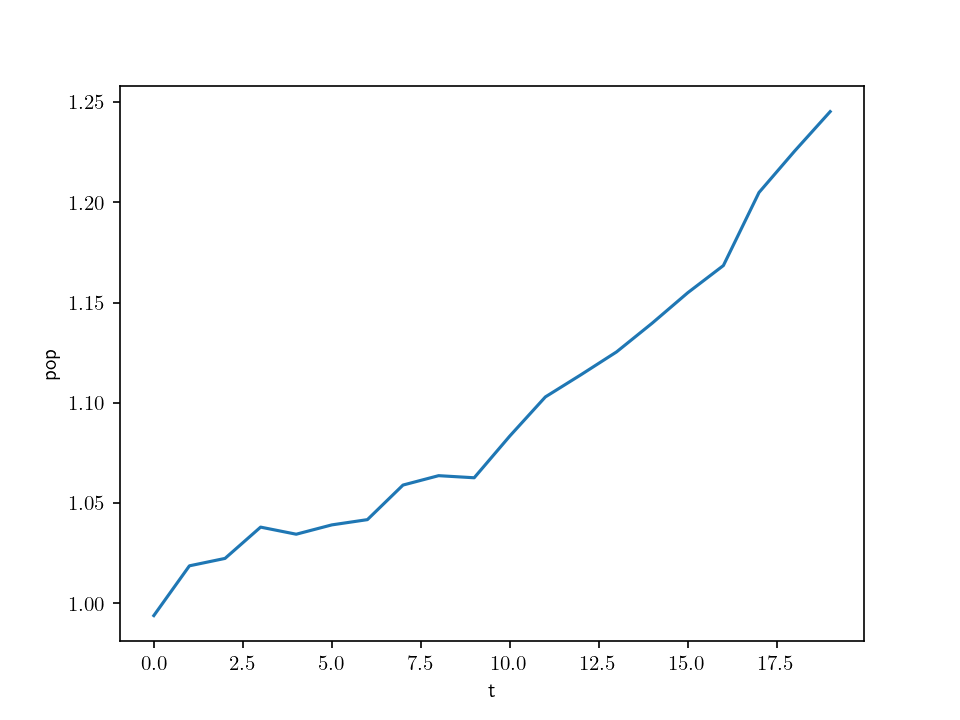

In [253]:
plotTS(np.array([compute_ricker_variance(p) / ricker_null_var for 
                 p in np.linspace(0,0.3,num=20)]))

In [267]:
# The final value

sigma_p_final = 0.18

compute_ricker_variance(sigma_p_final) / ricker_null_var

1.099872876463571